### Store Sales Prediction

The success of any retail store depends upon its sales. More the sales made, more is the revenue. With 
a good customer service and care, the customer too enjoys a good shopping experience. This will lead 
to more in-flow of customers, opening more store branches across a city / country.

To enable this, store owners rely heavily on past data to predict future sales. This will help them in 
strategizing their business models and come up with innovative techniques and ideas to attract 
customers and set realistic goals.

Many medium to large stores implement this kind of analytics to understand trends like which products 
are getting sold faster, what are the slow moving products, impact of store types, etc. With new 
branches of the store, the analysis can get more complex and may also involve stiff competition from 
other competitors. 

Build a model to predict the Sales of a store


### Importing libraries

In [1]:
# pandas and numpy
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder                 # converting categorical to numerical
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to normalize and standadize the data

# Splitting 
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,LeaveOneOut,cross_val_score,RepeatedStratifiedKFold

from sklearn.metrics import mean_squared_error # to calculate the error
from sklearn.metrics import mean_absolute_error # to calculate the  error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Grid search
from sklearn.model_selection import GridSearchCV

### Reading the data

In [2]:
df=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
df.shape

(14204, 12)

**Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


**Describe**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Null Values**

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

There are more number of outliers in the given dataset.

**Filling null values**

**Numerical Columns**

In [8]:
# numerical columnn
a =  df.select_dtypes(exclude='object')  
a.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.074402,182.0950,1998,732.3800
4,8.93,0.064299,53.8614,1987,994.7052


**Categorical Columns**

In [9]:
# categorical column
b =  df.select_dtypes(include='object')  
b.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


### EDA

In [20]:
sb.set(style="darkgrid")

In [21]:
a.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

**Item_Outlet_Sales**

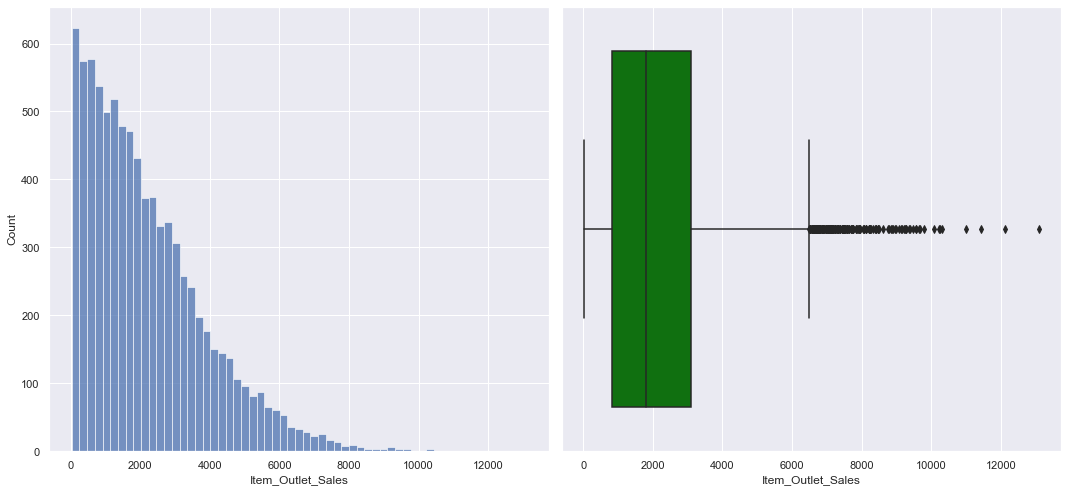

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x=df['Item_Outlet_Sales'],ax=ax[0])
sb.boxplot(x=df['Item_Outlet_Sales'],color='green')
plt.tight_layout()

##### Interpretations :
* The target columns has right skewed data.
* From the boxplot we can see that target has the more number of outliers.
* But from the income data if the sales was high it was good so we are not doing any outlier treatment.

**Distribution of Numerical columns**

**Histogram for all the numerical columns**

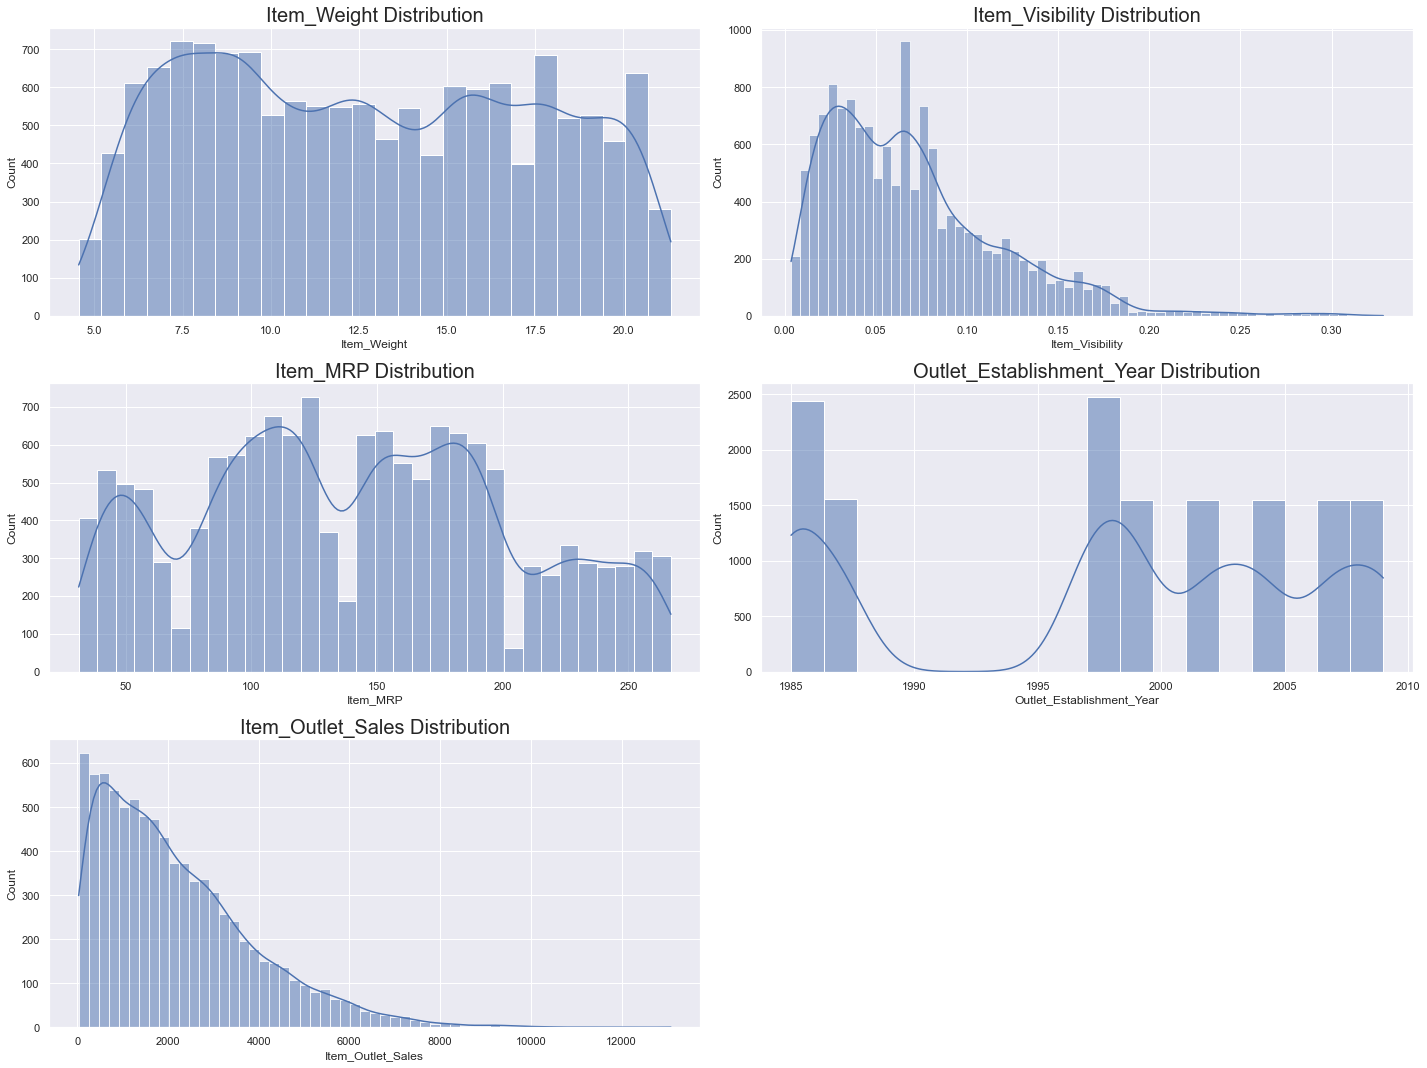

In [23]:
plt.figure(figsize = (20,15))
z=1
for col in a.columns:
    plt.subplot(3,2,z)
    sb.histplot(x = df[col],kde=True)
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretations :
* Item visibility distribution and Item outlet sales are having right skewed data.
* Item visibility and Item outlet sales can having outliers.
* Item weight and Item MRP are almost having normally distributed data.

**Boxplot for all the numerical columns**

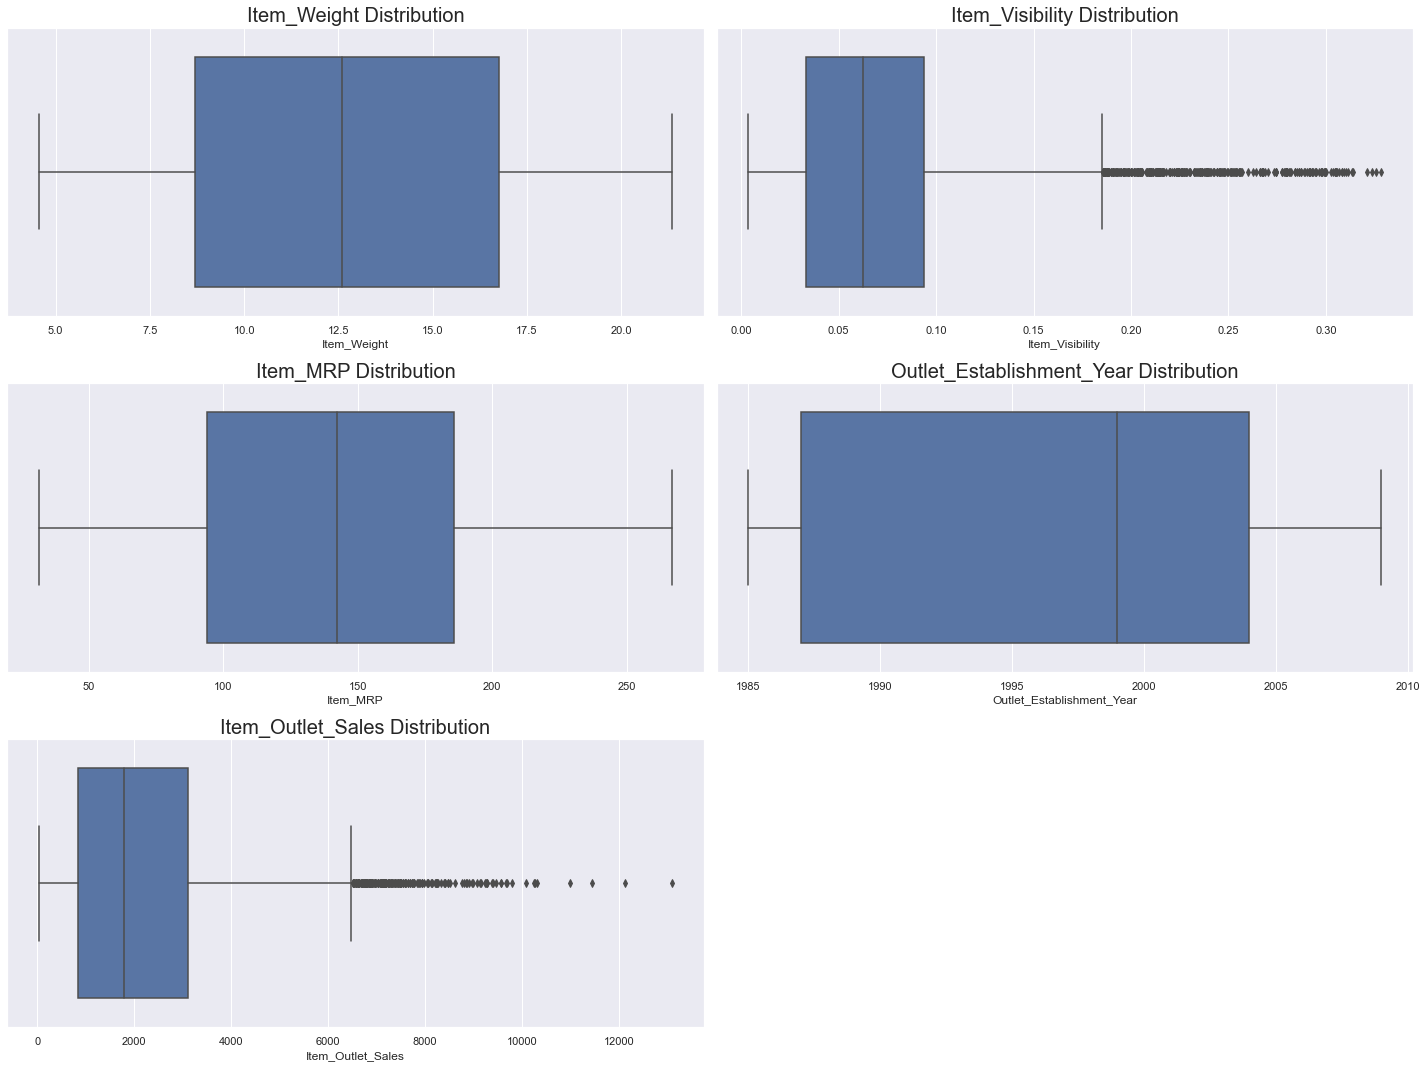

In [24]:
plt.figure(figsize = (20,15))
z=1
for col in a.columns:
    plt.subplot(3,2,z)
    sb.boxplot(x = df[col])
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretations :
* From the box plots we can see that Item visibility and Item outlet sales are having outliers.
* Item weight has more spread in their data.

**Outlet size**

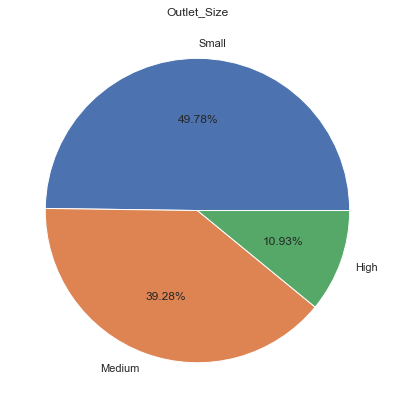

In [25]:
pie = b['Outlet_Size'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(pie.values,labels=pie.index,autopct='%.2f%%')
plt.title('Outlet_Size')
plt.show()

##### Interpretation :
* From the above plot we can see that their are more number or half of the outlet size are small.
* The are very less High outlet size.

**Item Fat Content**

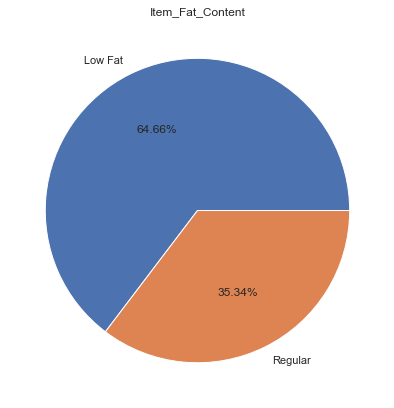

In [26]:
pie = b['Item_Fat_Content'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(pie.values,labels=pie.index,autopct='%.2f%%')
plt.title('Item_Fat_Content')
plt.show()

##### Interpretation :
* There are more number of products having low fat content.

**Outlet Type**

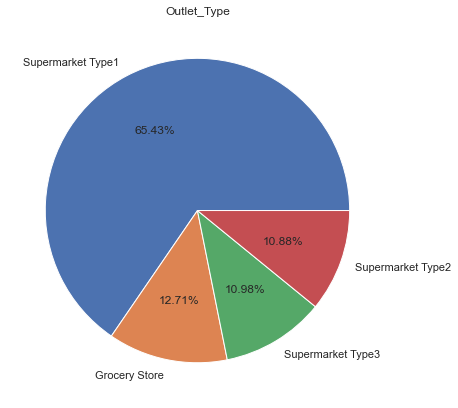

In [27]:
pie = b['Outlet_Type'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(pie.values,labels=pie.index,autopct='%.2f%%')
plt.title('Outlet_Type')
plt.show()

##### Interpretation :
* There are more number supermarket type 1 in the outlet type category.
* These are outlet type category are almost equal in the counts.

**Categorical Columns**

In [28]:
b.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

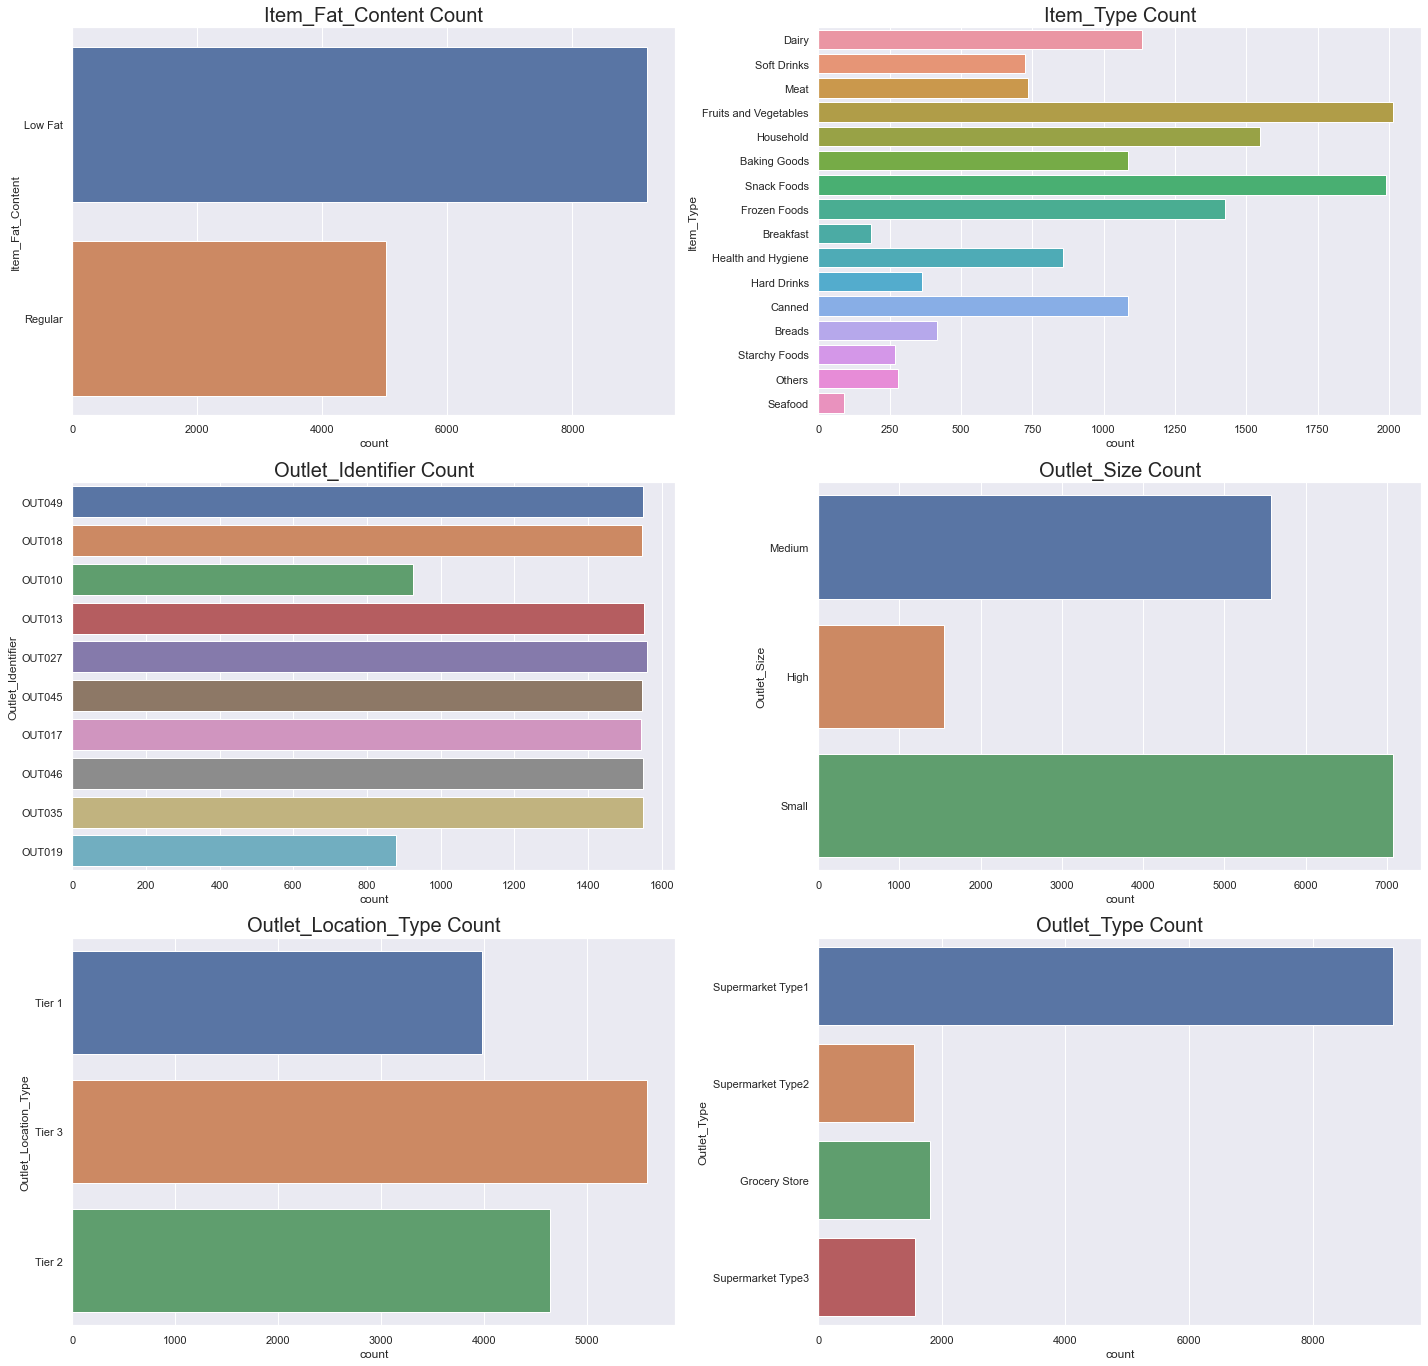

In [29]:
plt.figure(figsize = (20,25))
z=1
column = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in column:
    plt.subplot(4,2,z)
    sb.countplot(y = df[col])
    plt.title(f'{col} Count',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation:
* There are more number of low fat products in the Item_Fat_Content feature.
* There are more number of Fruits and vegetable and Snack food in the item type feature ie) Every market has high cont of fruits,vegetable and snack food.
* There are more number of small outlet size count.
* The location Tier 3 has more number of markets.

**Item outlet sales vs Item type**

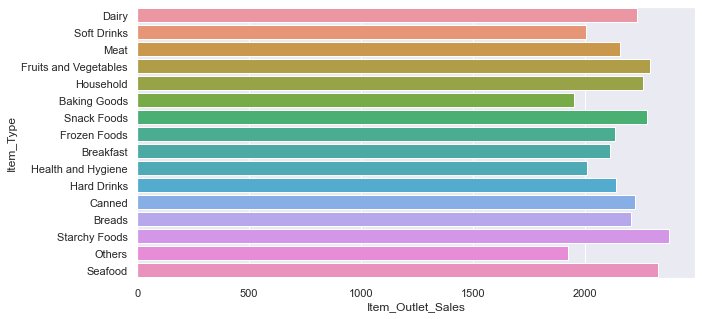

In [30]:
plt.figure(figsize=(10,5))
sb.barplot(x=df['Item_Outlet_Sales'],y=df['Item_Type'],ci=None)
plt.show()

##### Interpretation :
* From the above plot we can see that Seafood and Starchy foods has the highest sales than compared to all other item types.
* Baking goods has the very less sales.
* Household,Dairy, fruits and vegetable has the second highest sales .

**Item outlet sales vs Outlet Size**

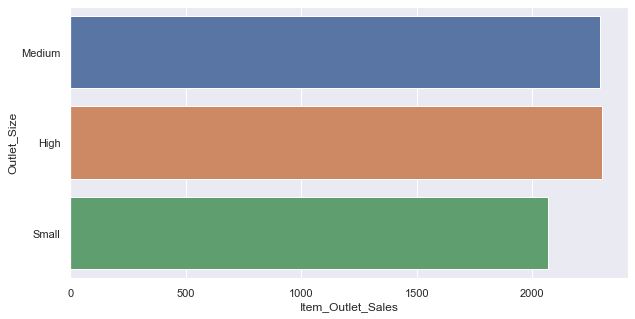

In [31]:
plt.figure(figsize=(10,5))
sb.barplot(x=df['Item_Outlet_Sales'],y=df['Outlet_Size'],ci=None)
plt.show()

##### Interpretation :
* Outlet size Medium has the highest outlet sales.
* Outlet size Small has the lowest outlet sales.

**Item outlet sales vs Outlet Location Type**

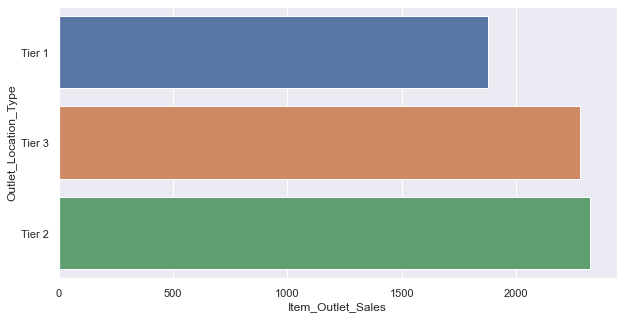

In [32]:
plt.figure(figsize=(10,5))
sb.barplot(x=df['Item_Outlet_Sales'],y=df['Outlet_Location_Type'],ci=None)
plt.show()

##### Interpretation :
* Outlet location type Tier 2 has the highest outlet sales.
* Outlet location type Tier 1 has the lowest outlet sales.

**Outlet_Size vs Item fat content**

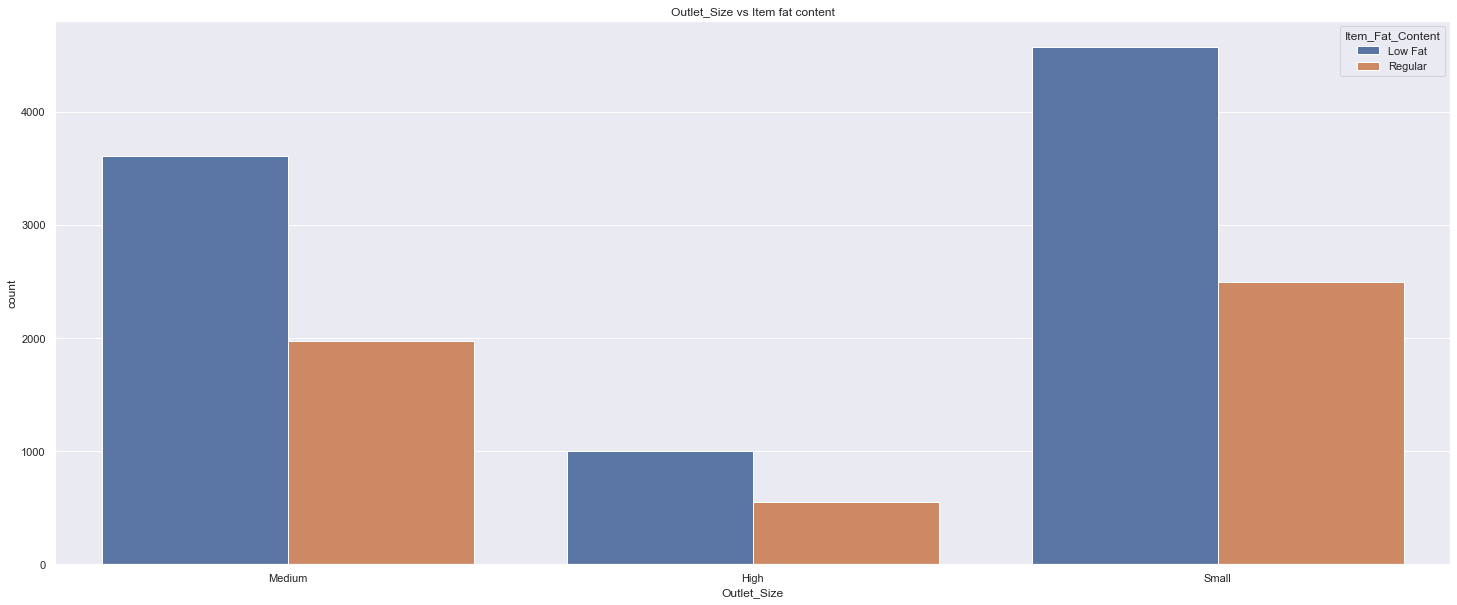

In [33]:
plt.figure(figsize=(25,10))
sb.countplot(x='Outlet_Size',hue='Item_Fat_Content',data=df)
plt.title('Outlet_Size vs Item fat content')
plt.show()

##### Interpretation :
* Every out has the most number of products with low fat content.

**Item type vs Item fat content**

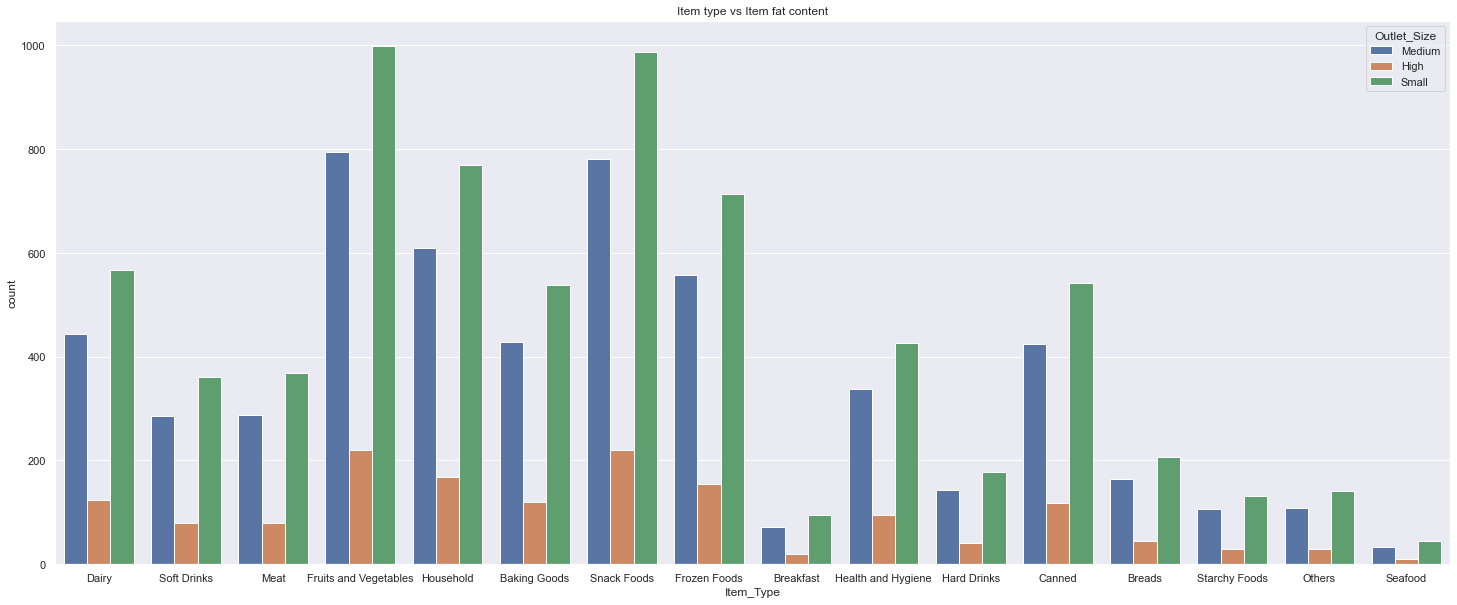

In [34]:
plt.figure(figsize=(25,10))
sb.countplot(x='Item_Type',hue='Outlet_Size',data=df)
plt.title('Item type vs Item fat content')
plt.show()

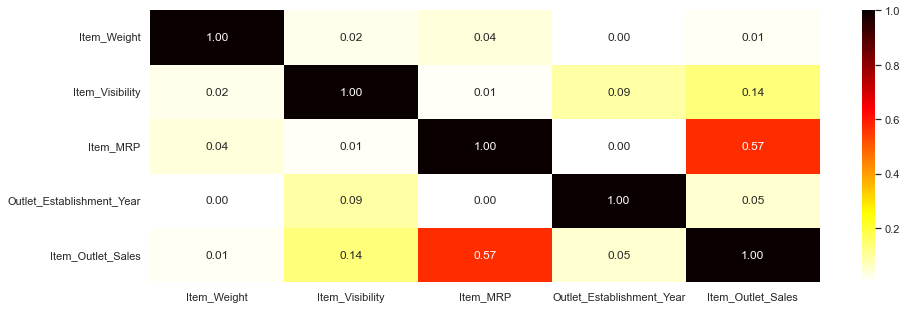

In [35]:
cor=abs(a.corr())
plt.figure(figsize=(15,5))
sb.heatmap(cor,annot=True,fmt='.2f',cmap='hot_r')
plt.show()

##### Interpretation :
* The target Item outlet sales has good positive correlation with Item MRP.
* Except this every features has very weak positive correlation.

**Item outlet sales vs Item MRP**

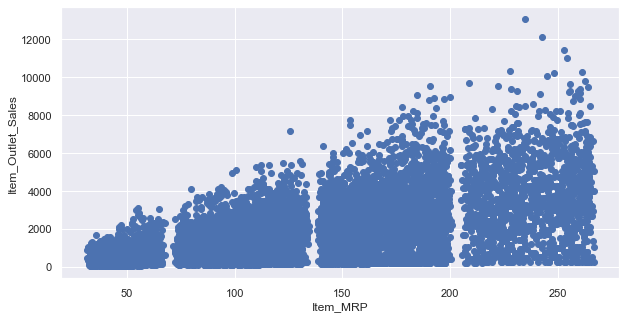

In [36]:
plt.figure(figsize = (10,5))
plt.scatter(x = df['Item_MRP'],y=df['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

##### Interpretation :
* From the above scatter plot wee can see that some positive correlation.

**Pair plot**

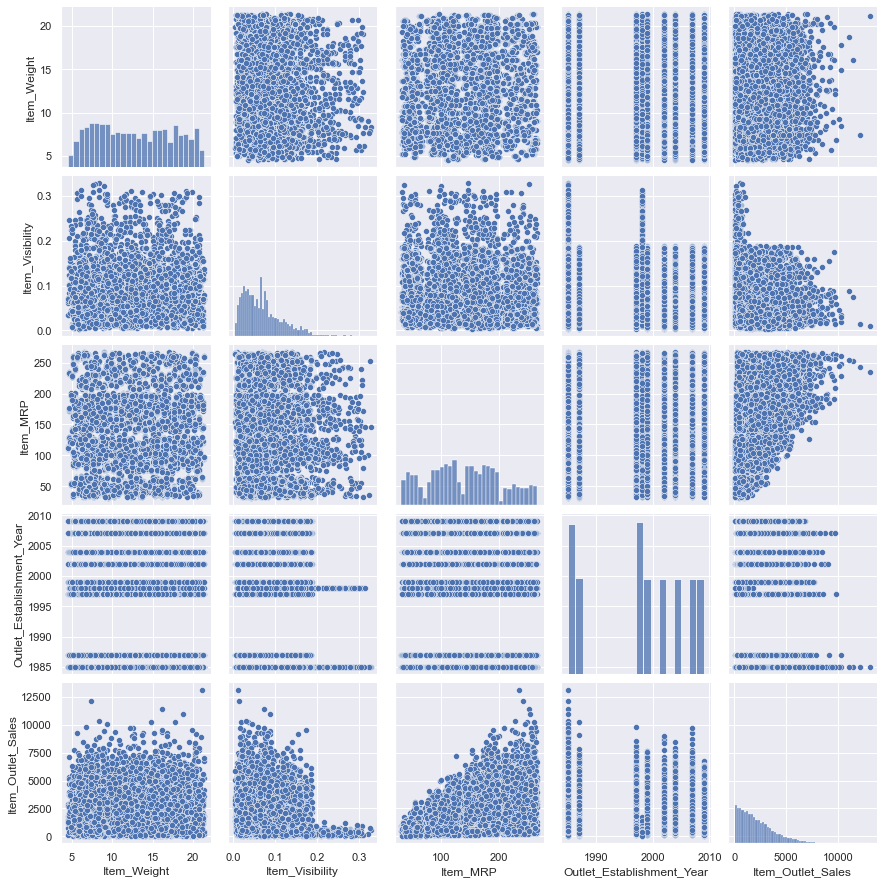

In [37]:
sb.pairplot(a)        
plt.show()

**Data preprocessing**

In [10]:
# copy
df_1=df.copy()

**Object to categorical**

In [11]:
# converting object into categorical
object = list(b.columns)
for c in object:
    df_1[c] = df_1[c].astype('category')
df_1.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

**Label Encoading**

In [12]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
for c in object:
    df_1[c]= label_encoder.fit_transform(df_1[c])
    
df_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


**Data Scaling**

In [41]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_df = df_1.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler() # normalize
    else:
        scaler = StandardScaler() # standard
    df_scaled = pd.DataFrame(scaler.fit_transform(df_1.to_numpy()),columns=new_df.columns)
    return df_scaled

In [42]:
scale = 'minmax' #normalize
data_scaled=feature_scale(scale)
data_scaled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,NaN
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,NaN
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,NaN
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,NaN


**Feature Selection**

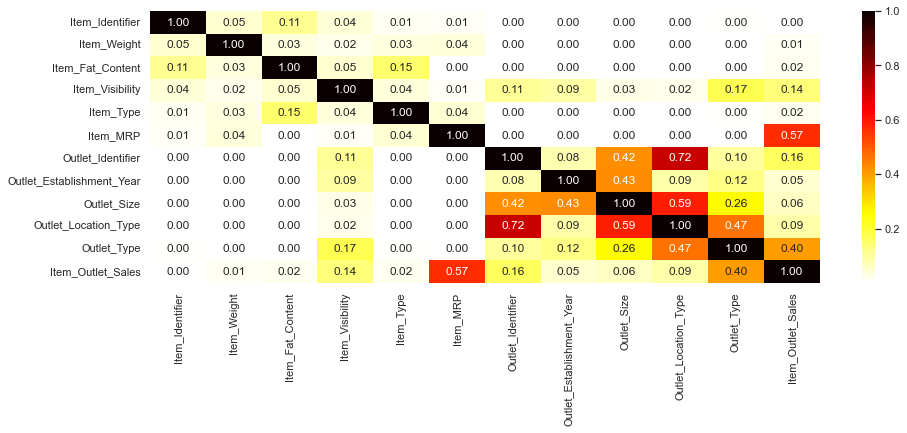

In [43]:
cor=abs(data_scaled.corr())
plt.figure(figsize=(15,5))
sb.heatmap(cor,annot=True,fmt='.2f',cmap='hot_r')
plt.show()

In [44]:
cor['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Item_Visibility              0.135247
Outlet_Location_Type         0.089367
Outlet_Size                  0.060517
Outlet_Establishment_Year    0.049135
Item_Fat_Content             0.018719
Item_Type                    0.017048
Item_Weight                  0.013261
Item_Identifier              0.002869
Name: Item_Outlet_Sales, dtype: float64

**Dropping some features**

In [45]:
data_scaled.drop(columns=['Item_Identifier','Item_Fat_Content'],inplace=True)

**Dependent and Independent**

In [46]:
# not null and null datas
data = data_scaled.loc[data_scaled['Item_Outlet_Sales'].notnull(),data_scaled.columns]
validation = data_scaled.loc[data_scaled['Item_Outlet_Sales'].isnull(),data_scaled.columns]

In [47]:
data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.081274,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.770765,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.871986,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.260494,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651


In [48]:
validation.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,0.964275,0.012284,0.866667,0.325012,1.000000,0.583333,0.5,0.0,0.333333,NaN
8524,0.222983,0.107301,0.266667,0.237819,0.222222,0.916667,1.0,0.5,0.333333,NaN
8525,0.598095,0.295552,0.733333,0.893316,0.000000,0.541667,0.5,1.0,0.000000,NaN
8526,0.164335,0.036370,0.866667,0.525233,0.222222,0.916667,1.0,0.5,0.333333,NaN
8527,0.538553,0.354122,0.266667,0.861381,0.555556,0.000000,0.5,1.0,1.000000,NaN


##### Splitting X and Y

In [49]:
x = data.drop(columns = 'Item_Outlet_Sales')   # Independent
y = data['Item_Outlet_Sales']                  # target

### Hold out

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=23)  # Taking 75:25 ratio for train and test
print(f"Shape of X Traindata = {x_train.shape},X Testdata = {x_test.shape}")
print(f"Shape of Y Traindata = {y_train.shape},Y Testdata = {y_test.shape}")

Shape of X Traindata = (6392, 9),X Testdata = (2131, 9)
Shape of Y Traindata = (6392,),Y Testdata = (2131,)


**1.Linear regression**

In [51]:
linreg = LinearRegression() # building the model
lin_model = linreg.fit(x_train, y_train) # fitting the model

In [52]:
# predicting the test data
lin_pred = lin_model.predict(x_test)
lin_pred

array([0.11545977, 0.2265896 , 0.20400941, ..., 0.25186794, 0.14715915,
       0.22970813])

**Hyperparameter tuning for decision tree regressor,Random Forest regressor and adaboost**

In [54]:
def hyper_parameter(model_name):
    depth =[1,2,3,4,5,6,7,8,9,1,14,20,30]
    sample_leaf = [1,2,3,4,5,6,7,8,9,20,50,100,200]
    estimators = [1,3,5,7,8,9,10,11,13,15,17,19,21]
    score_train=[]
    score_test=[]
    minimum_sample_leaf = []
    depth_list = []
    number_of_estimators = []
    mse=[]
    rmse=[]

    if model_name == 'decisiontreeregressor':
        for i in depth:
            for j in sample_leaf:
                decision_tree_model = DecisionTreeRegressor(max_depth=i,min_samples_leaf=j).fit(x_train,y_train)
                train_score = decision_tree_model.score(x_train,y_train) 
                test_score = decision_tree_model.score(x_test,y_test)
                decision_tree_pred = decision_tree_model.predict(x_test)
                decision_tree_mse = mean_squared_error(y_test,decision_tree_pred)
                decision_tree_rmse = mean_squared_error(y_test,decision_tree_pred,squared = False)

                
                depth_list.append(i)
                minimum_sample_leaf.append(j)
                mse.append(decision_tree_mse) 
                rmse.append(decision_tree_rmse)
                score_train.append(train_score*100)
                score_test.append(test_score*100)

        comparision = pd.DataFrame({'Depth':depth_list,'Minimum leaf Sample':minimum_sample_leaf,'Train score':score_train,
                                    'Test score':score_test,'Mean squared error':mse,'Root Mean squared error':rmse})
        return(comparision)  

    elif model_name=='randomforestregressor':
        params = {'max_depth': [1,2,4,6,7,9,10,11,13,23],'min_samples_split': [1,3,5,7,10,15,35,50],
                  'n_estimators': [1,3,5,7,9,11,13,15,30,40,50]}  
        random_forest_model=RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=random_forest_model,param_grid=params,cv = 5, n_jobs=-1, verbose=1, scoring="r2")          
        grid_search_fit=grid_search.fit(x_train, y_train)
        grid_search_score=grid_search.best_score_
        random_forest_best=grid_search.best_estimator_
        
        return(grid_search_score,random_forest_best)
        
    elif model_name == 'adaboostregressor':
        for i in estimators:
            adaboost_model = AdaBoostRegressor(n_estimators=i).fit(x_train,y_train)
            train_score = adaboost_model.score(x_train,y_train) 
            test_score = adaboost_model.score(x_test,y_test)
            adaboost_pred = adaboost_model.predict(x_test)
            adaboost_mse = mean_squared_error(y_test,adaboost_pred)
            adaboost_rmse = mean_squared_error(y_test,adaboost_pred,squared = False)
            
            number_of_estimators.append(i)
            mse.append(adaboost_mse) 
            rmse.append(adaboost_rmse)
            score_train.append(train_score*100)
            score_test.append(test_score*100)      
            
        comparision = pd.DataFrame({'Estimators':number_of_estimators,'Train score':score_train,
                                    'Test score':score_test,'Mean squared error':mse,'Root Mean squared error':rmse})
        return(comparision)  
    

**2.Decision tree regressor**

In [55]:
model_name='decisiontreeregressor'
decision_test_best=hyper_parameter(model_name)
decision_test_best.sort_values('Mean squared error',ascending=True)

,Depth,Minimum leaf Sample,Train score,Test score,Mean squared error,Root Mean squared error
75,6,50,60.900954,60.358959,0.006872,0.082899
62,5,50,60.293347,60.313122,0.006880,0.082947
53,5,2,60.317671,60.300239,0.006882,0.082960
52,5,1,60.317671,60.300239,0.006882,0.082960
55,5,4,60.317522,60.300228,0.006882,0.082960
...,...,...,...,...,...,...
9,1,20,23.812851,23.216666,0.013311,0.115374
7,1,8,23.812851,23.216666,0.013311,0.115374
119,1,3,23.812851,23.216666,0.013311,0.115374
143,20,1,96.204981,20.292399,0.013818,0.117551


At depth = 6,Minimum leaf Sample=50 we are getting good results.

In [56]:
decision_tree_model = DecisionTreeRegressor(max_depth=6,min_samples_leaf=50).fit(x_train,y_train)

In [57]:
decision_tree_pred = decision_tree_model.predict(x_test)
decision_tree_pred

array([0.09927468, 0.27023517, 0.23472547, ..., 0.30356513, 0.13963626,
       0.27023517])

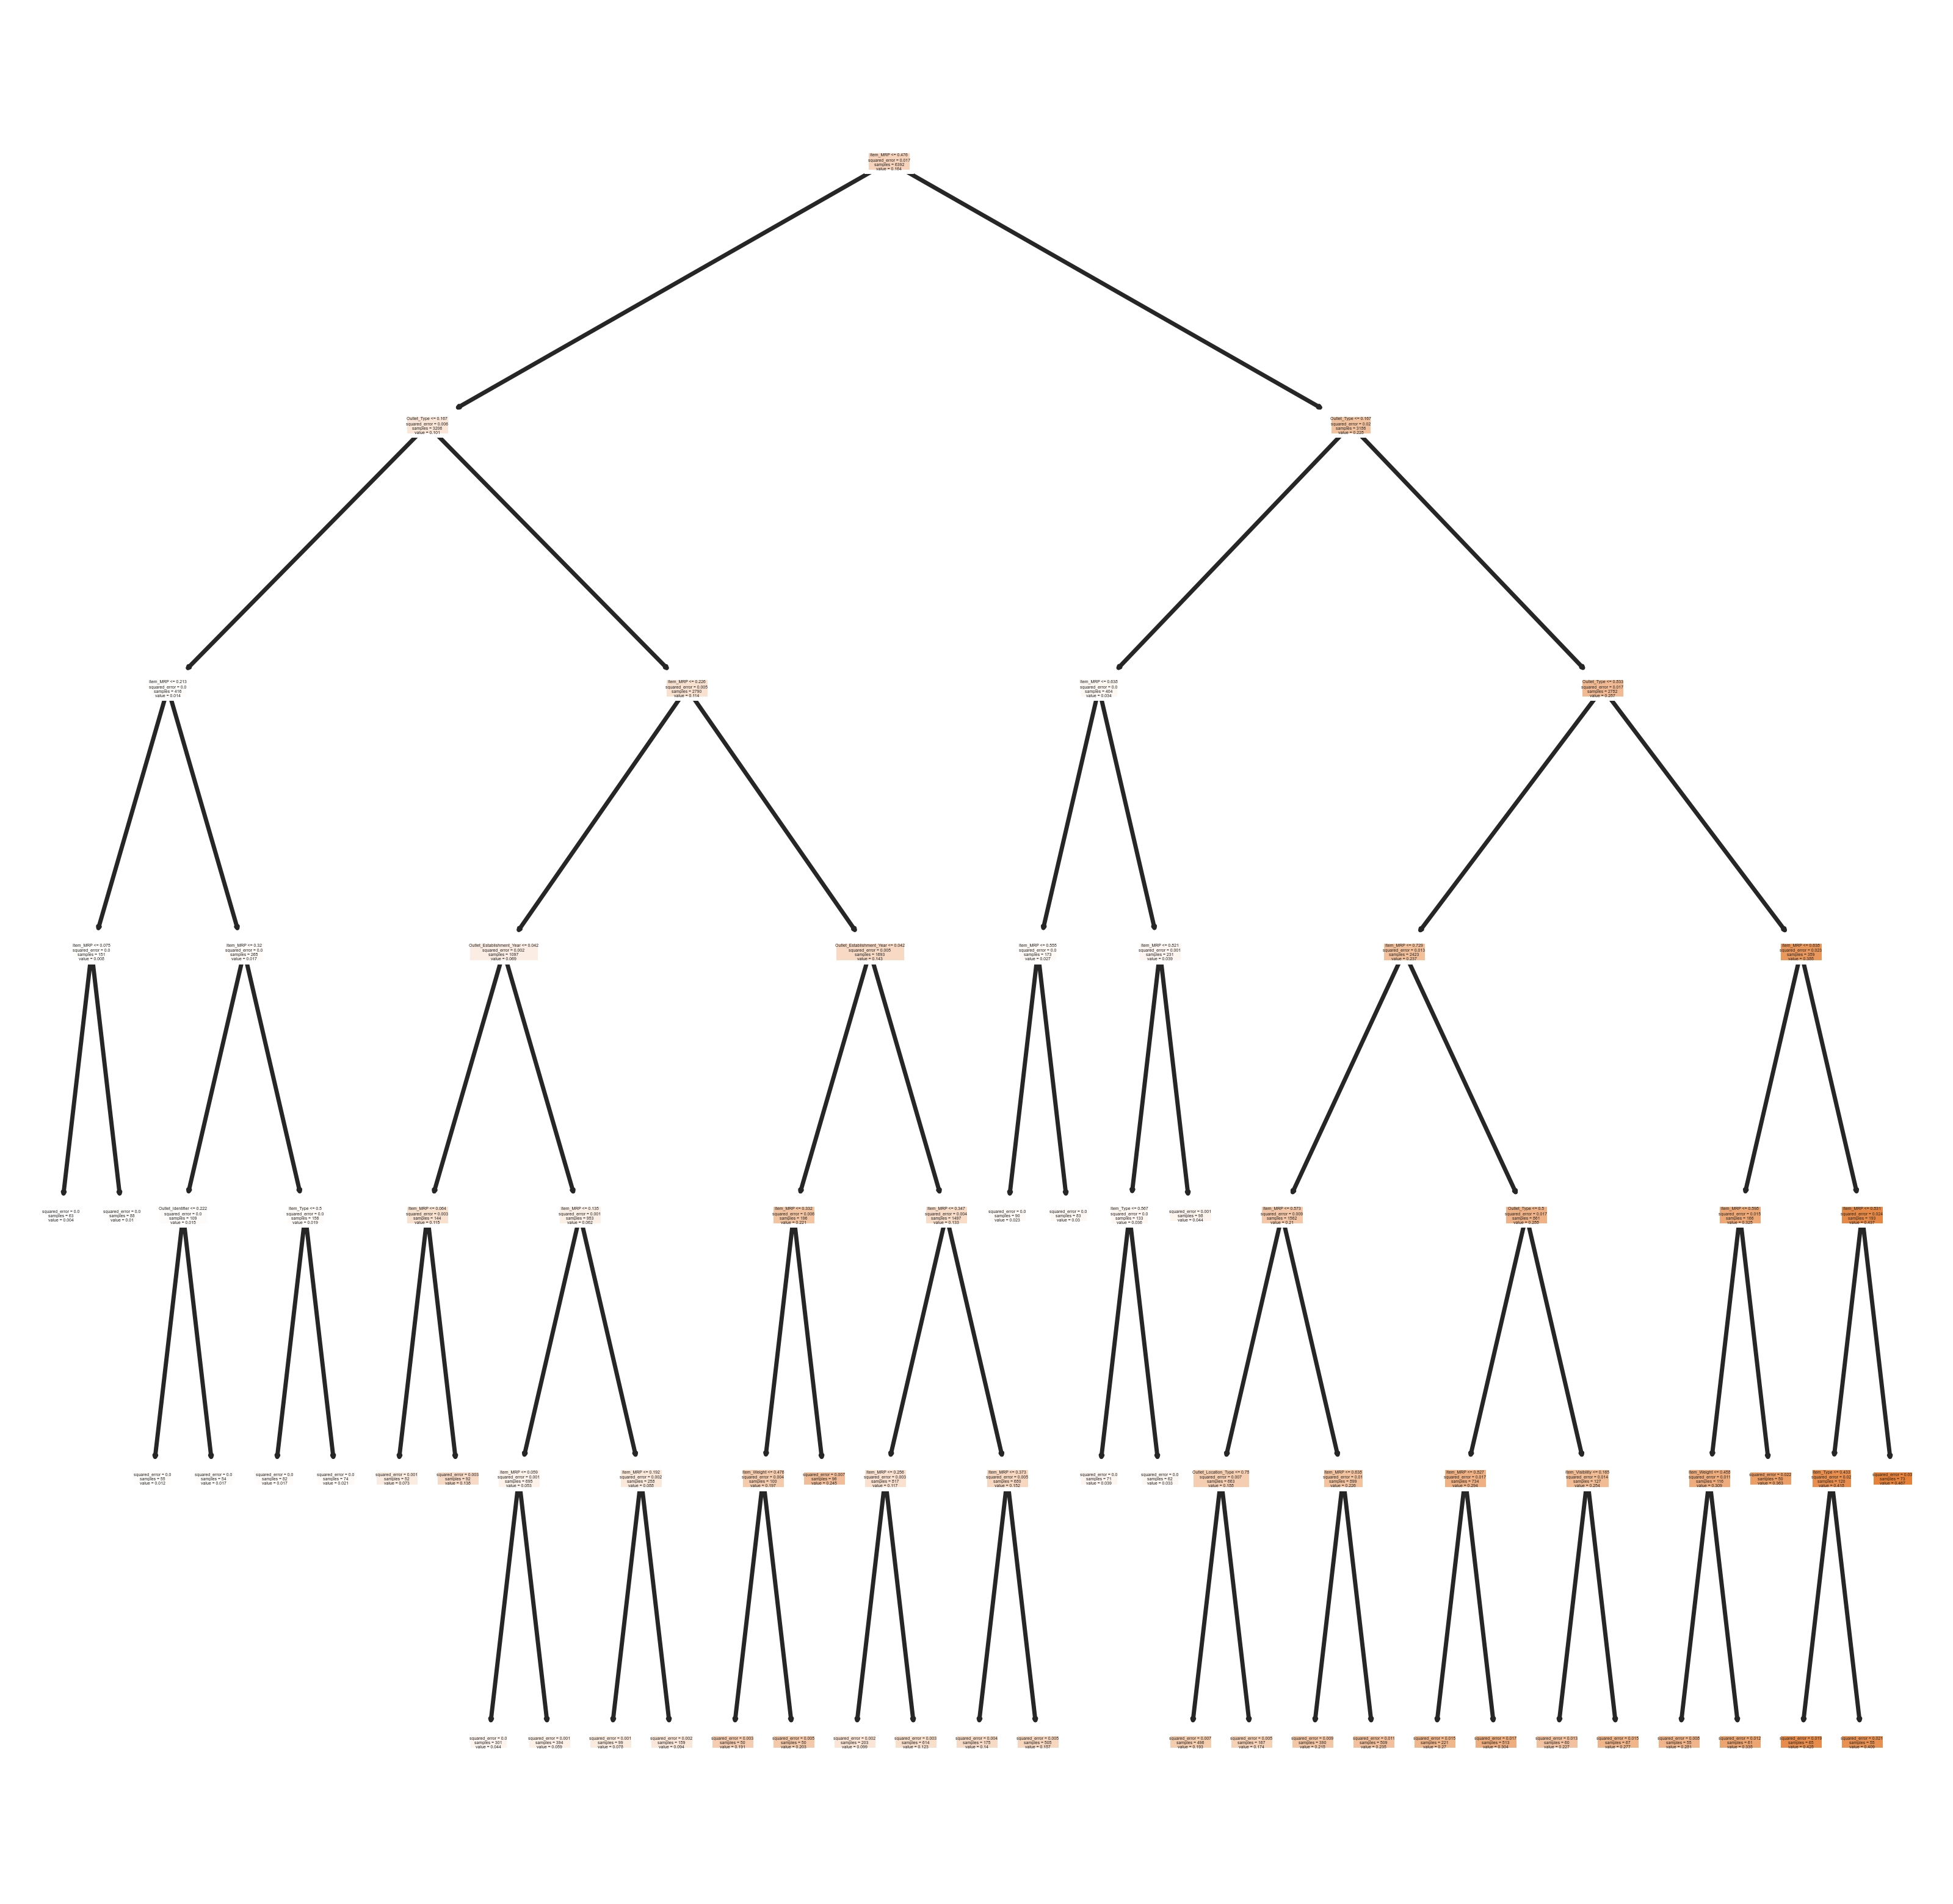

In [58]:
fig, ax = plt.subplots(1,1,figsize = (8,8), dpi=500)

plot_tree(decision_tree_model,
           feature_names = x.columns, 
           filled = True);

fig.savefig('Decision_Tree.png')

**3.Random Forest**

In [59]:
model_name='randomforestregressor'
rf_score,rf_best=hyper_parameter(model_name)

Fitting 5 folds for each of 880 candidates, totalling 4400 fits


In [60]:
rf_score

0.5936883881338371

In [61]:
rf_best

RandomForestRegressor(max_depth=6, min_samples_split=50, n_estimators=40,
                      n_jobs=-1, random_state=42)

best hyperpaara meter for random forest regressor.

In [62]:
random_forest_model = RandomForestRegressor(max_depth=6, min_samples_split=50, n_estimators=40,n_jobs=-1, random_state=42).fit(x_train,y_train)

In [63]:
random_forest_pred = random_forest_model.predict(x_test)
random_forest_pred

array([0.09632824, 0.26799914, 0.2318843 , ..., 0.29065414, 0.14582432,
       0.28062692])

**4.Adaboost Regressor**

In [64]:
model_name='adaboostregressor'
adaboost_best=hyper_parameter(model_name)
adaboost_best.sort_values('Mean squared error',ascending=True)

,Estimators,Train score,Test score,Mean squared error,Root Mean squared error
3,7,57.737607,58.238324,0.007240,0.085087
7,11,57.146968,57.314482,0.007400,0.086023
6,10,57.116830,56.957137,0.007462,0.086383
2,5,57.187075,56.757656,0.007497,0.086583
5,9,56.537540,56.648474,0.007515,0.086692
9,15,55.484652,56.400212,0.007559,0.086940
12,21,55.667341,56.241635,0.007586,0.087098
4,8,55.837742,56.122087,0.007607,0.087217
1,3,56.484387,55.657221,0.007687,0.087677
8,13,53.501682,54.431017,0.007900,0.088881


At estimator=7 we are getting good results.

In [65]:
adaboost_model = AdaBoostRegressor(n_estimators=7).fit(x_train,y_train)

In [66]:
adaboost_model_pred = adaboost_model.predict(x_test)
adaboost_model_pred

array([0.0916714 , 0.28461608, 0.28461608, ..., 0.28461608, 0.14177006,
       0.28461608])

**5.Stacking**

In [67]:
def get_stacking():
    base = []
    base.append((('linear_regression', lin_model)))
    base.append(('Random_forest', random_forest_model))
    base.append((('Decision_tree', decision_tree_model)))
    # define meta model
    meta = lin_model
    # define the stacking ensemble
    model_sc = StackingRegressor(estimators=base, final_estimator=meta, cv=3).fit(x_train,y_train)  
    return model_sc

In [68]:
stacking_model = get_stacking()

In [69]:
stacking_pred=stacking_model.predict(x_test)
stacking_pred

array([0.0971485 , 0.26709596, 0.23135146, ..., 0.28969395, 0.14602015,
       0.27940991])

**Hold out Actual and predicted Data**

In [70]:
predicted_hold_out = pd.DataFrame({'y_test':y_test,
                                   'Linear_Regression':lin_pred,
                                   'Decision_Tree':decision_tree_pred,
                                   'Random Forest':random_forest_pred,
                                   'Adaboost':adaboost_model_pred,
                                   'Stacking':stacking_pred})
predicted_hold_out

,y_test,Linear_Regression,Decision_Tree,Random Forest,Adaboost,Stacking
6824,0.090278,0.115460,0.099275,0.096328,0.091671,0.097148
3979,0.493216,0.226590,0.270235,0.267999,0.284616,0.267096
1340,0.139243,0.204009,0.234725,0.231884,0.284616,0.231351
3370,0.018566,0.020737,0.059373,0.053377,0.061557,0.054560
1992,0.127818,0.072068,0.123179,0.118379,0.133442,0.118911
...,...,...,...,...,...,...
3923,0.259104,0.214700,0.234725,0.231884,0.284616,0.231369
4461,0.087422,0.268445,0.234725,0.229410,0.284616,0.229045
1407,0.342242,0.251868,0.303565,0.290654,0.284616,0.289694
6649,0.245945,0.147159,0.139636,0.145824,0.141770,0.146020


<AxesSubplot:xlabel='y_test', ylabel='Linear_Regression'>

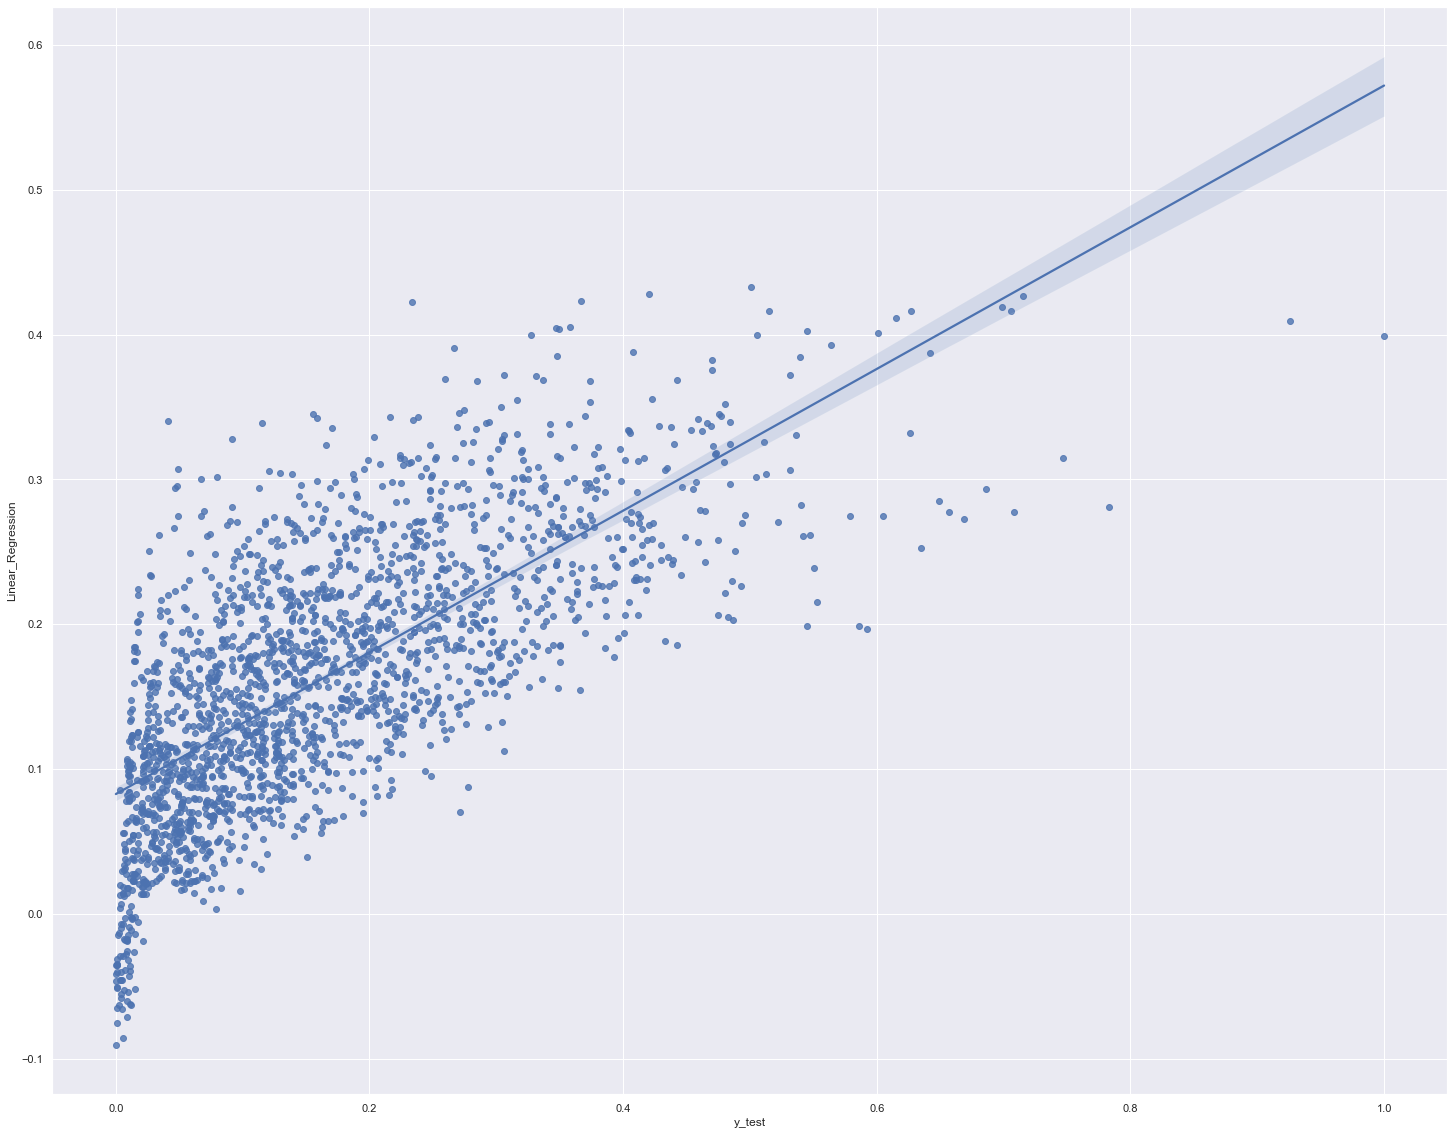

In [94]:
plt.figure(figsize = (25,20))
sb.regplot(predicted_hold_out['y_test'],predicted_hold_out['Linear_Regression'])

**Hold out actual and predicted scatter plot**

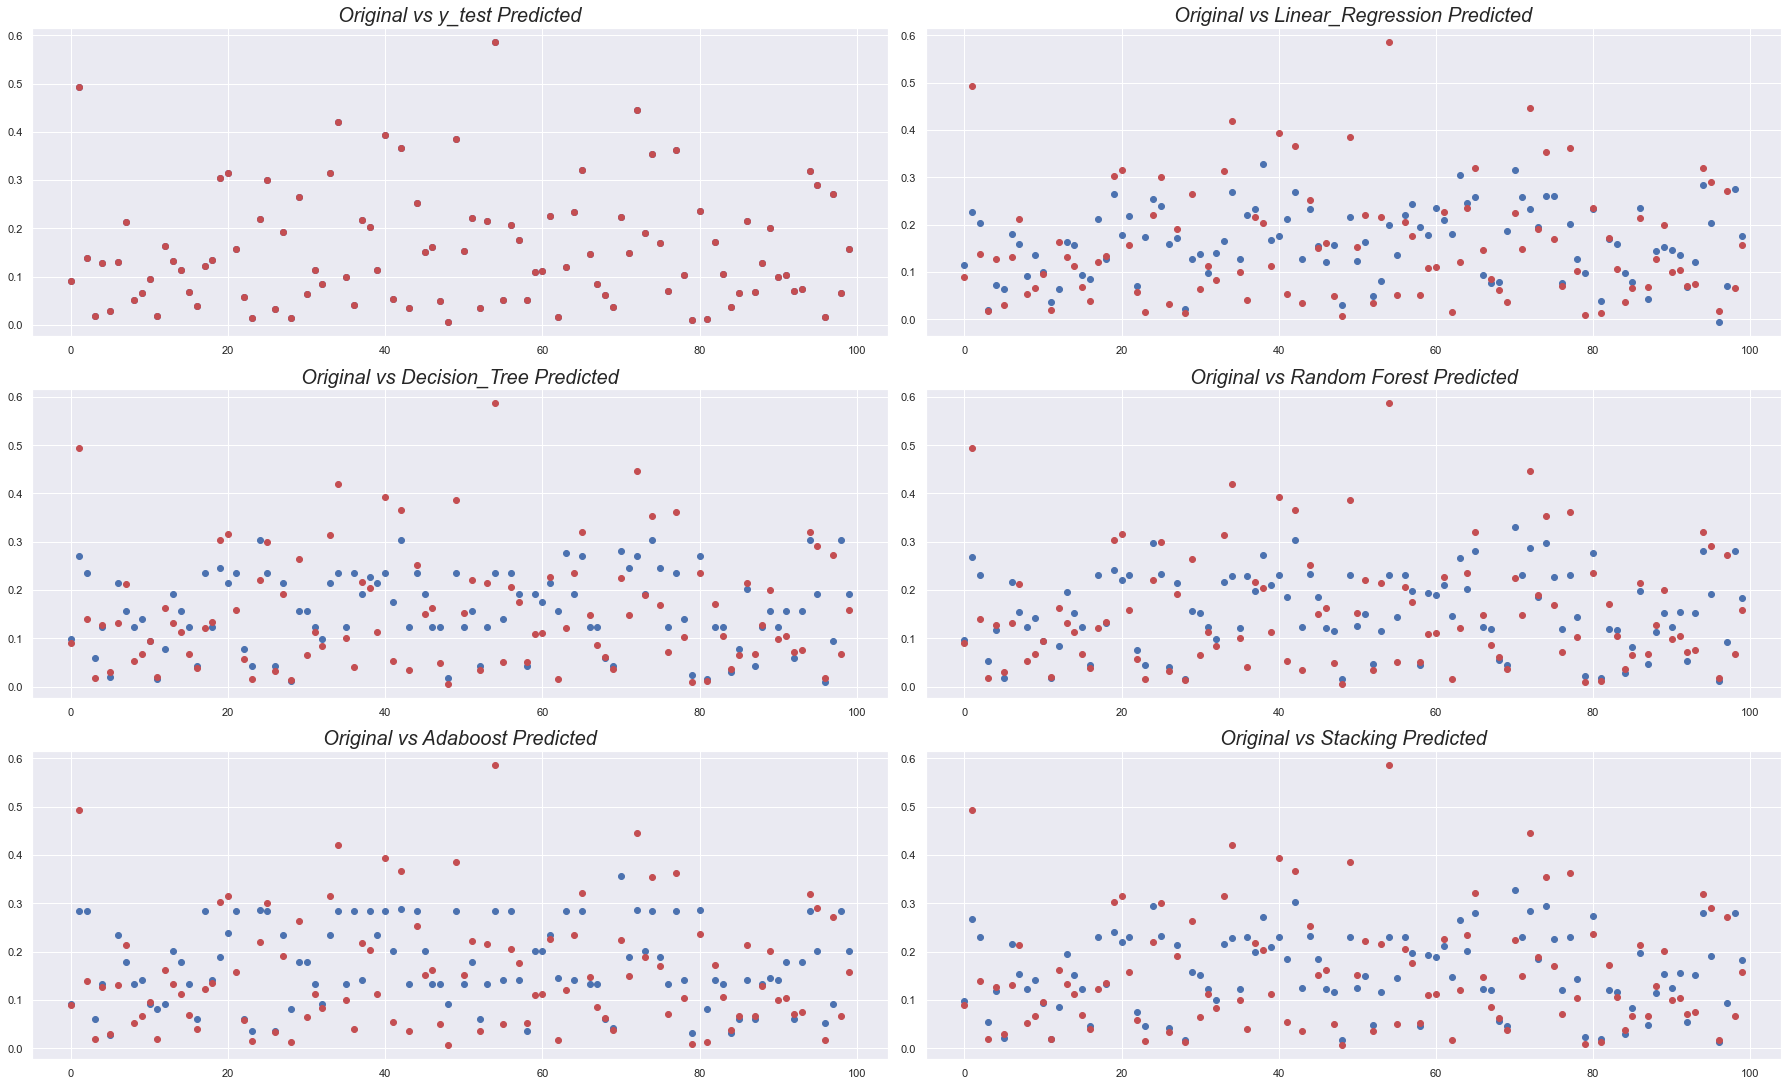

In [99]:
x_len = list(np.arange(0,len(y_test)))

plt.figure(figsize = (25,20))
z=1
for i in predicted_hold_out.columns:
    plt.subplot(4,2,z)
    plt.scatter(x_len[:100],predicted_hold_out[i][:100])
    plt.scatter(x_len[:100],predicted_hold_out['y_test'][:100],color='r')
    plt.title(f'Original vs {i} Predicted',fontstyle='oblique',fontsize=20)
    z=z+1
plt.tight_layout()
plt.show()

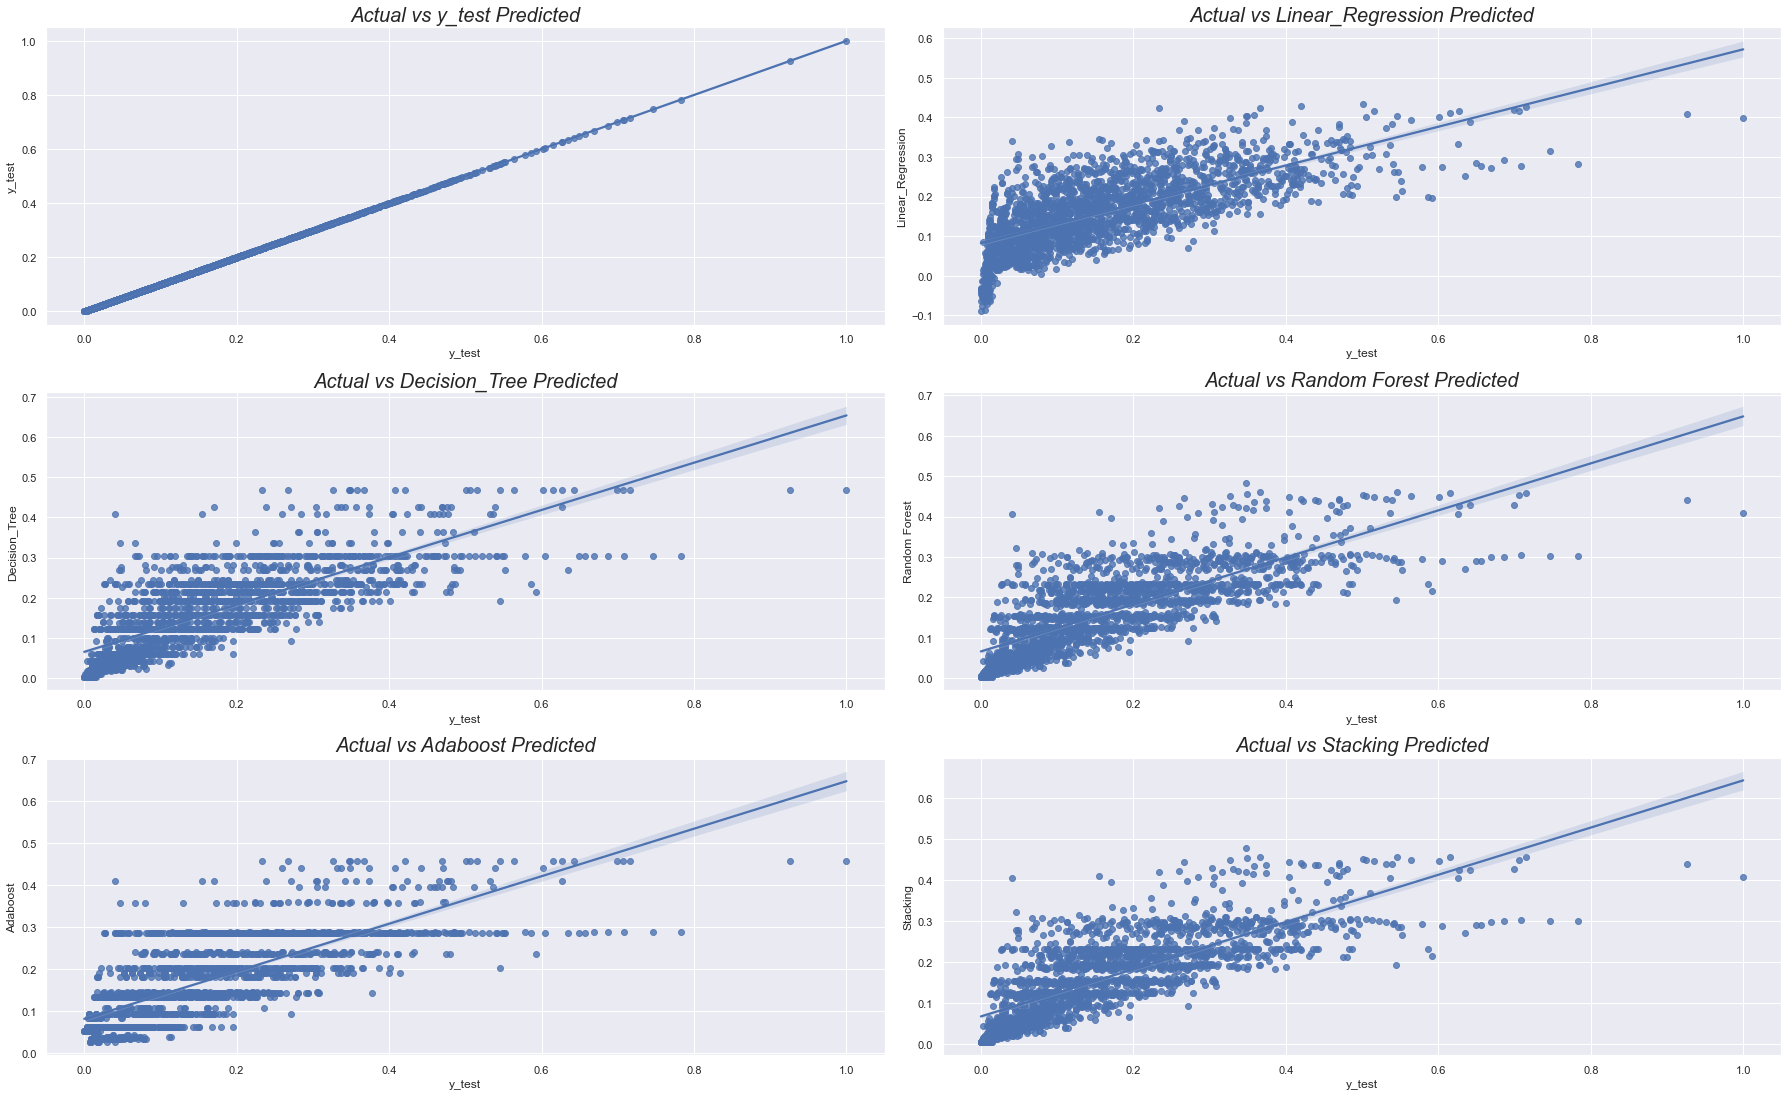

In [95]:
x_len = list(np.arange(0,len(y_test)))

plt.figure(figsize = (25,20))
z=1
for i in predicted_hold_out.columns:
    plt.subplot(4,2,z)
    sb.regplot(predicted_hold_out['y_test'],predicted_hold_out[i])
    plt.title(f'Actual vs {i} Predicted',fontstyle='oblique',fontsize=20)
    z=z+1
plt.tight_layout()
plt.show()

### Kfold

In [71]:
x=np.array(x)
y=np.array(y)

In [72]:
x=np.array(x)
y=np.array(y)
kf = KFold(n_splits=10,shuffle = False,random_state= None)
for train_index,test_index in kf.split(x,y):
    print("Train:",train_index,'\nTest:',test_index)
    x1_train,x1_test = x[train_index], x[test_index]
    y1_train,y1_test = y[train_index], y[test_index]

Train: [ 853  854  855 ... 8520 8521 8522] 
Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 

**1.Linear regression**

In [73]:
lin_model1 = linreg.fit(x1_train, y1_train) # fitting the model
lin_pred1 = lin_model1.predict(x1_test)

**2.Decision tree regressor**

In [75]:
decision_tree_model1 = DecisionTreeRegressor(max_depth=6,min_samples_leaf=50).fit(x1_train,y1_train)
decision_tree_pred1 = decision_tree_model1.predict(x1_test)

**3.Random Forest**

In [76]:
random_forest_model1 = RandomForestRegressor(max_depth=6, min_samples_split=50, n_estimators=40,n_jobs=-1, random_state=42).fit(x1_train,y1_train)
random_forest_pred1 = random_forest_model1.predict(x1_test)

**4.Adaboost Regressor**

In [77]:
adaboost_model1 = AdaBoostRegressor(n_estimators=7).fit(x1_train,y1_train)
adaboost_model_pred1 = adaboost_model1.predict(x1_test)

**5.Stacking**

In [78]:
def get_stacking():
    base = []
    base.append((('linear_regression', lin_model1)))
    base.append(('Random_forest', random_forest_model1))
    base.append((('Decision_tree', decision_tree_model1)))
    # define meta model
    meta = lin_model1
    # define the stacking ensemble
    model_sc = StackingRegressor(estimators=base, final_estimator=meta, cv=3).fit(x1_train,y1_train)  
    return model_sc

In [79]:
stacking_model1 = get_stacking()
stacking_pred1=stacking_model1.predict(x1_test)

**Kfold actual and predicted**

In [80]:
predicted_kfold = pd.DataFrame({'y1_test':y1_test,
                                   'Linear_Regression':lin_pred1,
                                   'Decision_Tree':decision_tree_pred1,
                                   'Random Forest':random_forest_pred1,
                                   'Adaboost':adaboost_model_pred1,
                                   'Stacking':stacking_pred1})
predicted_kfold

,y1_test,Linear_Regression,Decision_Tree,Random Forest,Adaboost,Stacking
0,0.080078,0.029977,0.043274,0.043840,0.073437,0.043935
1,0.033765,0.135934,0.154461,0.151072,0.145889,0.152297
2,0.129552,0.195615,0.204838,0.208342,0.245479,0.206420
3,0.023360,0.124527,0.030760,0.023780,0.029824,0.029879
4,0.159033,0.350833,0.265691,0.298027,0.316954,0.284977
...,...,...,...,...,...,...
847,0.210293,0.225808,0.282739,0.281371,0.279325,0.280154
848,0.039529,0.123985,0.124522,0.122938,0.145889,0.123915
849,0.088850,0.091885,0.105504,0.101569,0.097446,0.103394
850,0.138835,0.144678,0.124522,0.120196,0.145889,0.122903


**Hold out actual and predicted scatter plot**

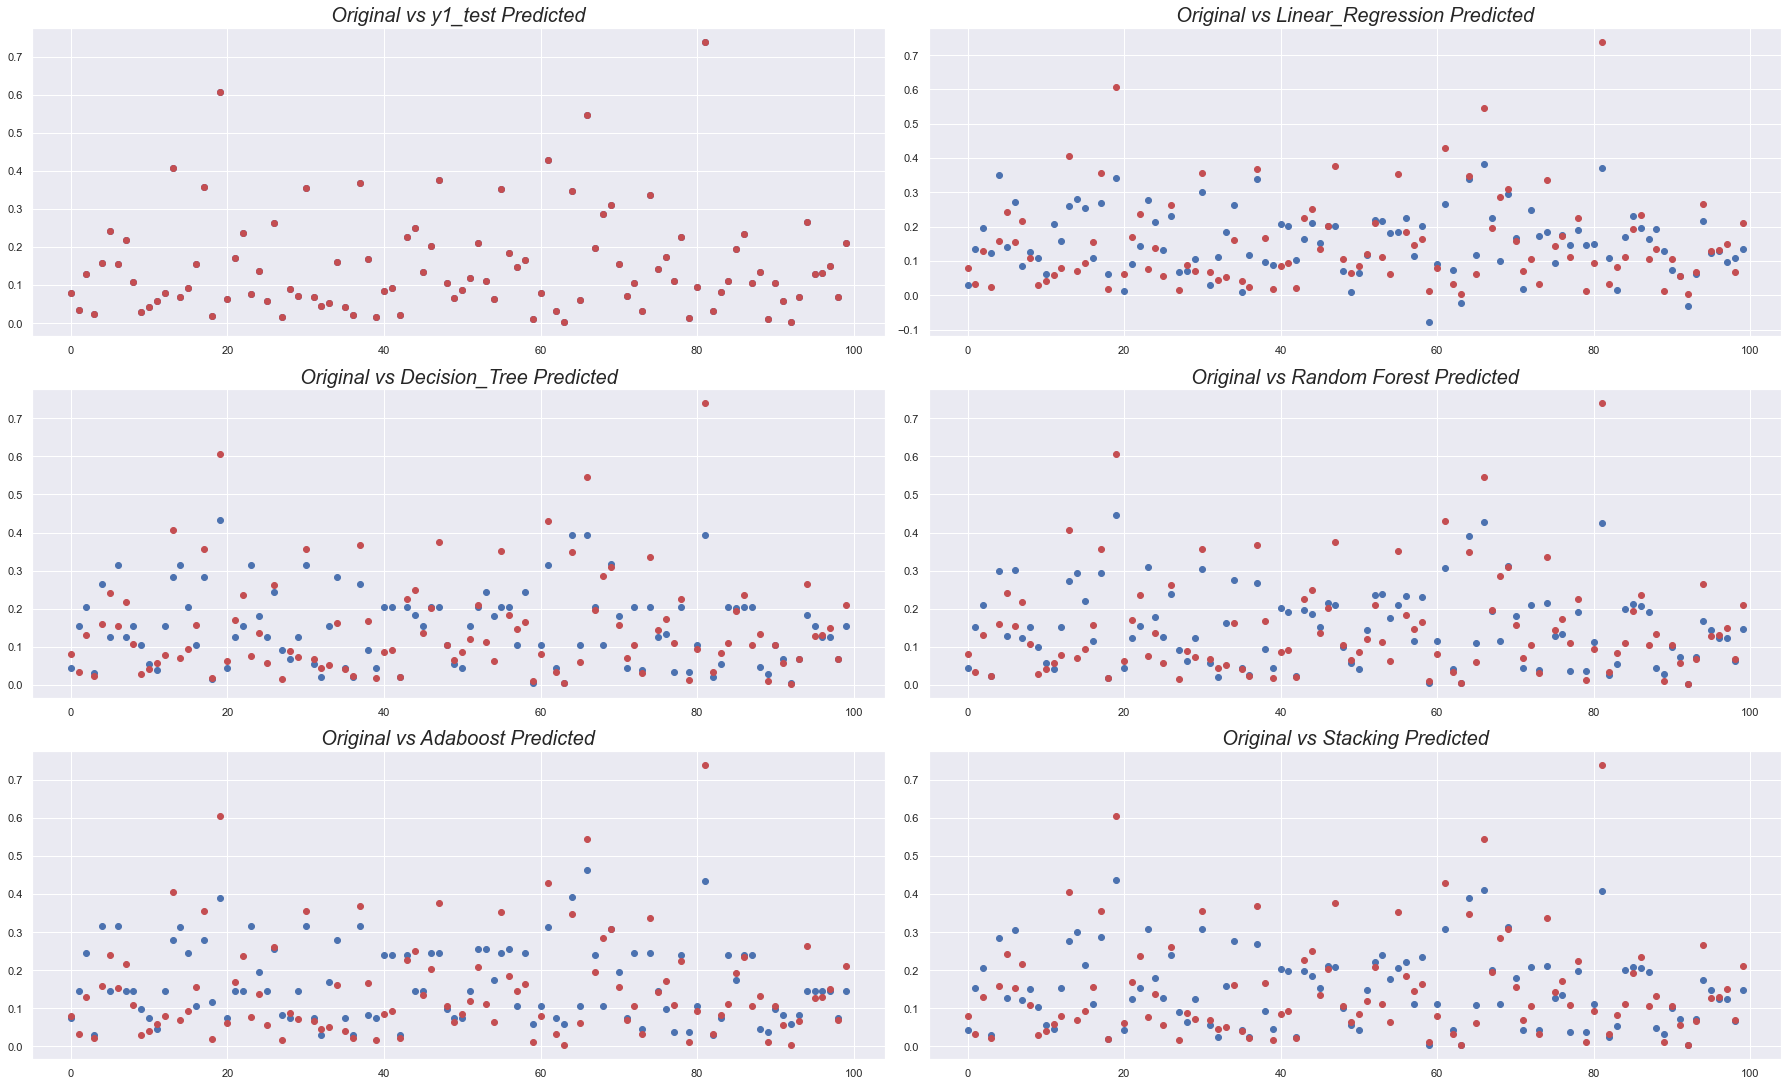

In [100]:
x_len = list(np.arange(0,len(y_test)))

plt.figure(figsize = (25,20))
z=1
for i in predicted_kfold.columns:
    plt.subplot(4,2,z)
    plt.scatter(x_len[:100],predicted_kfold[i][:100])
    plt.scatter(x_len[:100],predicted_kfold['y1_test'][:100],color='r')
    plt.title(f'Original vs {i} Predicted',fontstyle='oblique',fontsize=20)
    z=z+1
plt.tight_layout()
plt.show()

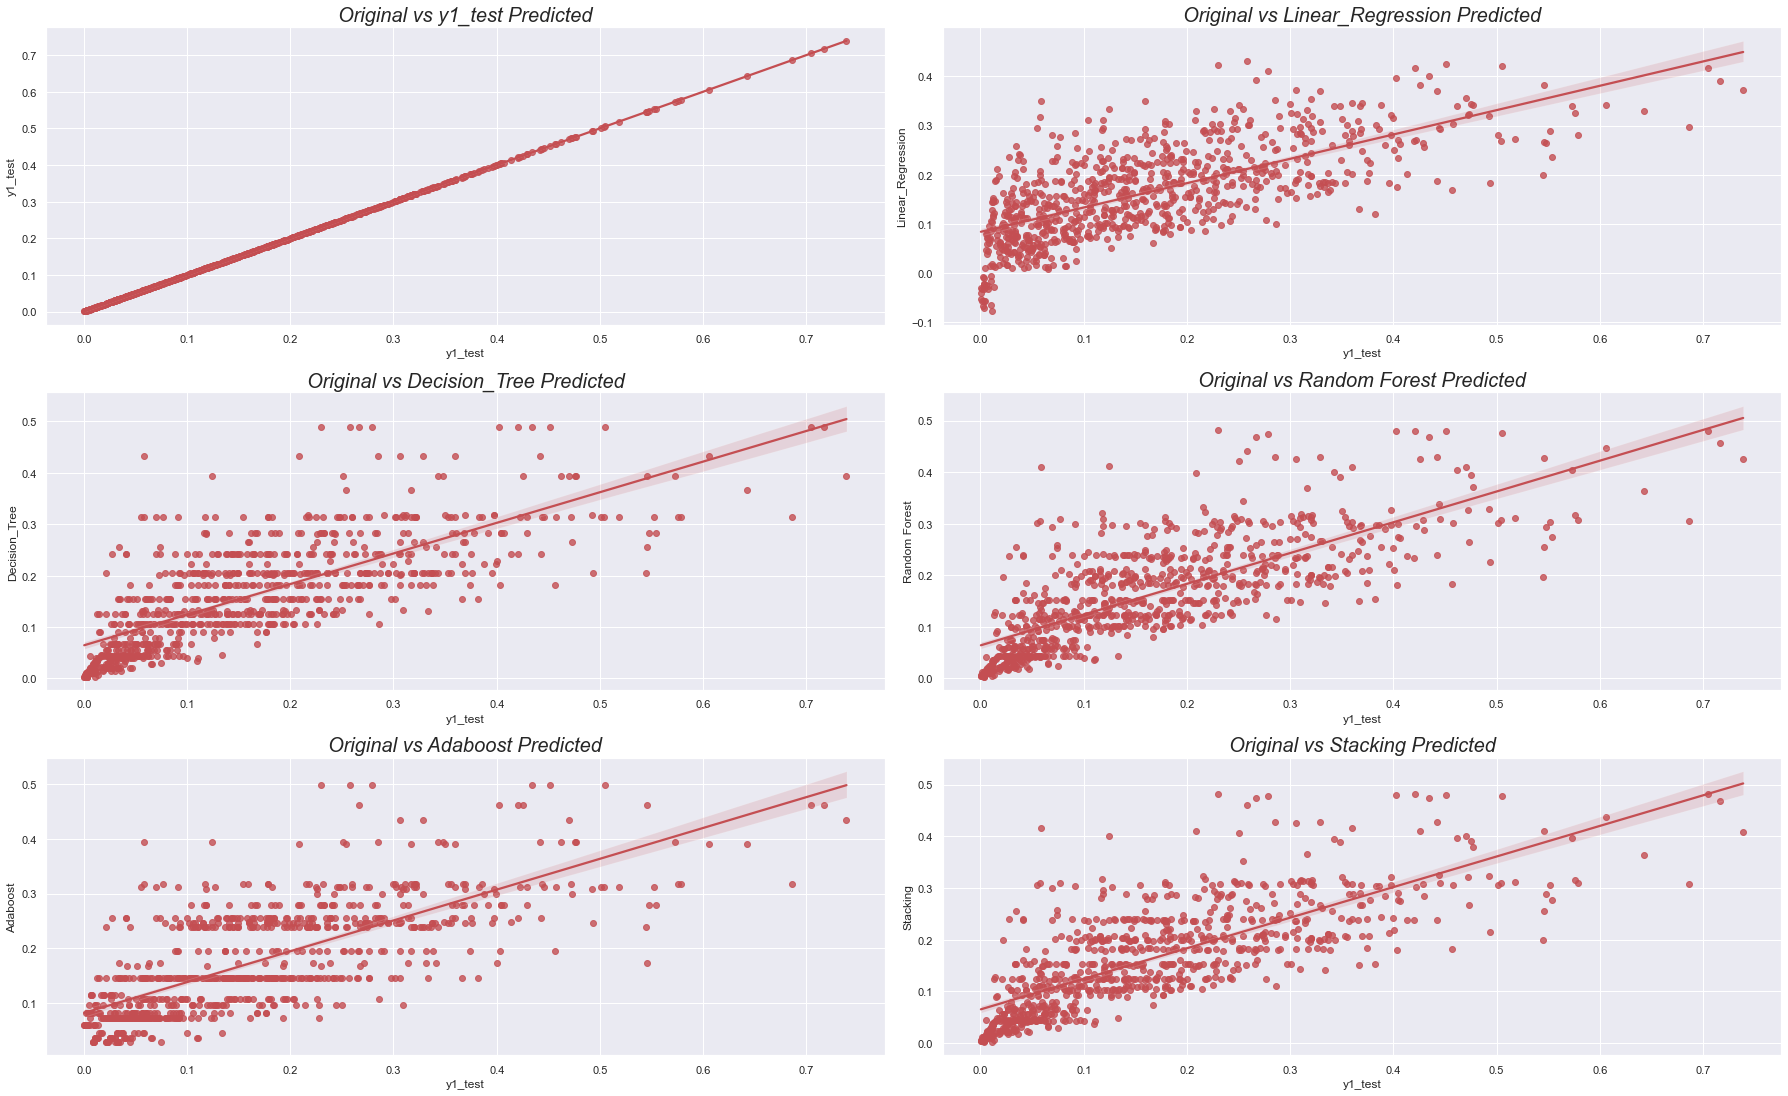

In [98]:
x_len = list(np.arange(0,len(y_test)))

plt.figure(figsize = (25,20))
z=1
for i in predicted_kfold.columns:
    plt.subplot(4,2,z)
    sb.regplot(predicted_kfold['y1_test'],predicted_kfold[i],color='r')
    plt.title(f'Original vs {i} Predicted',fontstyle='oblique',fontsize=20)
    z=z+1
plt.tight_layout()
plt.show()

**Evaluating the Models**

In [81]:
models=[lin_model,decision_tree_model,random_forest_model,adaboost_model,stacking_model]

In [82]:
def evaluation(models,cv_name,x_train,y_train,x_test,y_test,x,y):
    score_train=[]
    score_test=[]
    mse_score=[]
    rmse_score=[] 
    mse = []
    rmse_score = []
    score = []
    
    if cv_name=='holdout':
        for i in models:
            train = i.score(x_train,y_train) 
            test = i.score(x_test,y_test)
            pred = i.predict(x_test)
            mse = mean_squared_error(y_test,pred)
            rmse = mean_squared_error(y_test,pred,squared = False)
            mse_score.append(mse)
            rmse_score.append(rmse)
            score_train.append(train*100)
            score_test.append(test*100)

        comparision = pd.DataFrame({'Model':['Liner_Reg','Decision_tree','Random Forest','AdaBoost','Stacked'],
                             'Train_score':score_train,
                             'Test_score':score_test,
                             'MSE':mse_score,
                             'RMSE':rmse_score})

        return(comparision) 
    
    elif cv_name=='kfold':
        cv = KFold(n_splits=10,shuffle = False,random_state= None)
        for i in models:           
            r2 = cross_val_score(i,x,y,cv=cv,scoring='r2')
            r2_score = r2.mean()
            ms = cross_val_score(i,x,y,cv=cv,scoring = 'neg_mean_squared_error')
            mean_squared = abs(ms.mean())

            rmse = np.sqrt(abs(mean_squared))
            mse.append(mean_squared)
            rmse_score.append(rmse)
            score.append(r2_score*100)

        comparision = pd.DataFrame({'Model':['Liner Regression','Decision Tree','Random Forest','AdaBoost','Stacked'],
                                'R2':score,'MSE':mse,'RMSE':rmse})


        return (comparision)


In [83]:
hold_out_scores=evaluation(models,'holdout',x_train,y_train,x_test,y_test,x,y)
hold_out_scores

,Model,Train_score,Test_score,MSE,RMSE
0,Liner_Reg,50.029033,50.709675,0.008545,0.092439
1,Decision_tree,60.900954,60.358959,0.006872,0.082899
2,Random Forest,61.995331,60.256817,0.006890,0.083006
3,AdaBoost,56.448020,56.070061,0.007616,0.087268
4,Stacked,61.957737,60.222367,0.006896,0.083042


##### Interpretation :
* Random forest, Stacked , Hold out are giving good performance in Hold out method.
* But the score is just above 60 .
* So we can say that this model is average.

In [84]:
kfold_comparision = evaluation(models,'kfold',x_train,y_train,x_test,y_test,x,y)
kfold_comparision

,Model,R2,MSE,RMSE
0,Liner Regression,49.956322,0.008531,0.082951
1,Decision Tree,59.305848,0.006928,0.082951
2,Random Forest,59.588475,0.006879,0.082951
3,AdaBoost,56.126130,0.007517,0.082951
4,Stacked,59.576424,0.006881,0.082951


##### Interpretation :
* For Kfold method Stacked model giving the good performance than compared to other model.
* But for this data the performance is very low.
* The second highest is random forest.

##### Conclusion :
* Stacked giving good results in both Hold out and Kfold we are selecting stacked for predicting the unknown datas in the sales feature.

**Prediction for null values in the data set using the best model**

In [85]:
validation_test = validation.copy()

In [87]:
validation_test=validation_test.drop(columns='Item_Outlet_Sales')

In [88]:
validation_pred=stacking_model.predict(validation_test)

In [89]:
validation_pred

array([0.12104194, 0.10098754, 0.04626867, ..., 0.14770325, 0.26709117,
       0.09506047])

In [90]:
validation['Item_Outlet_Sales_predict']=validation_pred

In [91]:
validation.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Outlet_Sales_predict'],
      dtype='object')

In [93]:
validation[['Item_Weight', 'Item_Type', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Outlet_Sales_predict']]

,Item_Weight,Item_Type,Item_MRP,Item_Outlet_Sales,Item_Outlet_Sales_predict
8523,0.964275,0.866667,0.325012,NaN,0.121042
8524,0.222983,0.266667,0.237819,NaN,0.100988
8525,0.598095,0.733333,0.893316,NaN,0.046269
8526,0.164335,0.866667,0.525233,NaN,0.186344
8527,0.538553,0.266667,0.861381,NaN,0.439499
...,...,...,...,...,...
14199,0.353974,0.866667,0.467004,NaN,0.158975
14200,0.181304,1.000000,0.585126,NaN,0.213746
14201,0.324204,0.533333,0.371199,NaN,0.147703
14202,0.639774,0.200000,0.778154,NaN,0.267091


### Conclusion :
* The stacking model gives the good performance in both Hold out and Kfold method ,but their performance score is just nearer to 60% .
* It can be because we are having more number of outliers and many unknown values.
* And from the correlation heat map we can also see that there is no strong relation between the features.
* This can affect the performance of the model.
* For this data set we are getting very low performance for every model.